# DESARROLLO EXAMEN BÁSICO

**LEÓN ORTIZ DIEGO ENRIQUE**

## **_CASO 1_**

In [1]:
#Importando librerias necesarias
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
import scipy.stats as stats #Para calculo de probabilidades
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import train_test_split #Particionamiento
from sklearn.preprocessing import MinMaxScaler #Utilizar la normalizacion
from sklearn.preprocessing import StandardScaler #Utilizar la estandarizacion 
from sklearn.decomposition import PCA #Para la descomposicion de la varianza en el PCA
from imblearn.under_sampling import NearMiss        #Para llevar a cabo UnderSampling
from imblearn.over_sampling import RandomOverSampler #Para llevar a cabo OverSampling
from imblearn.combine import SMOTETomek              #Para combinar U/O Sampling

In [2]:
os.chdir("D:\Social Data Consulting\Python for Data Science\data")

In [3]:
miArchivo="TRAIN_FUGA.csv"
train_fuga=pd.read_csv(miArchivo,sep=",")
train_fuga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787495 entries, 0 to 787494
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          787495 non-null  int64  
 1   CODMES              787495 non-null  int64  
 2   TARGET_MODEL2       787495 non-null  int64  
 3   EDAD                787495 non-null  int64  
 4   SEXO                787495 non-null  object 
 5   DEPARTAMENTO        760520 non-null  object 
 6   INGRESO_BRUTO_M1    600241 non-null  float64
 7   FLG_CLIENTE         787495 non-null  object 
 8   SEGMENTO            787495 non-null  object 
 9   FLG_ADEL_SUELDO_M1  787495 non-null  int64  
 10  FREC_AGENTE         787495 non-null  int64  
 11  FLG_VEH_SF          518112 non-null  float64
 12  FLG_CONV_SF         518112 non-null  float64
 13  FREC_KIOSKO         787495 non-null  int64  
 14  FREC_BPI_TD         787495 non-null  int64  
 15  FREC_MON_TD         787495 non-nul

Al utilizar el comando .info podemos visualizar el tipo de dato de las variables y ademas la cantidad de datos por variables que son No Nulos 

**_Creamos un dataframe con los datos de Train_Fuga.csv_**

In [4]:
columns=train_fuga.columns

In [5]:
df_train_fuga=pd.DataFrame(train_fuga, columns=columns)
df_train_fuga.head()

,Unnamed: 0,CODMES,TARGET_MODEL2,EDAD,SEXO,DEPARTAMENTO,INGRESO_BRUTO_M1,FLG_CLIENTE,SEGMENTO,FLG_ADEL_SUELDO_M1,FREC_AGENTE,FLG_VEH_SF,FLG_CONV_SF,FREC_KIOSKO,FREC_BPI_TD,FREC_MON_TD,PROM_CTD_TRX_6M,ANT_CLIENTE,REC_AGENTE_TD,CTD_RECLAMOS_M1
0,1,201411,0,46,F,PIURA,NaN,NO CLIENTE,2,0,0,0.0,0.0,0,0,0,0.0,224.0,NaN,0
1,2,201411,0,54,M,LORETO,4718.0,CLIENTE,1BC,0,0,0.0,1.0,0,0,0,0.0,123.0,NaN,0
2,3,201411,0,81,M,NaN,NaN,CLIENTE,6,0,0,NaN,NaN,0,0,0,0.0,264.0,NaN,0
3,4,201411,0,42,M,PIURA,936.0,CLIENTE,2,0,0,NaN,NaN,0,0,0,0.0,263.0,NaN,0
4,5,201411,0,52,M,MOQUEGUA,5844.0,CLIENTE,1BC,0,0,NaN,NaN,0,0,0,0.0,263.0,NaN,0


**_Nos quedamos solo con las variables predictoras_**

In [6]:
variablesEliminar=['CODMES','FLG_CLIENTE','FLG_VEH_SF','FREC_MON_TD']

In [7]:
df_train_fuga.drop(variablesEliminar,axis=1, inplace=True)

### **_Limpieza de DATA_**

In [8]:
df_train_fuga['Unnamed: 0'] 
#Al parecer la variable Unnamed: 0 no nos brinda ninguna información util

0              1
1              2
2              3
3              4
4              5
           ...  
787490    787491
787491    787492
787492    787493
787493    787494
787494    787495
Name: Unnamed: 0, Length: 787495, dtype: int64

In [9]:
del df_train_fuga['Unnamed: 0']
# Al ser una variable que no nos brinda informacion procedemos a eliminarla


In [10]:
df_train_fuga.REC_AGENTE_TD.isnull().sum() 
#La variable REC_AGENTE_TD tiene un numero demasiado elevado de valores NaN, por lo que 
 #procedemos a eliminar dicha variable

695206

In [11]:
del df_train_fuga['REC_AGENTE_TD']

In [12]:
df_train_fuga.head()

,TARGET_MODEL2,EDAD,SEXO,DEPARTAMENTO,INGRESO_BRUTO_M1,SEGMENTO,FLG_ADEL_SUELDO_M1,FREC_AGENTE,FLG_CONV_SF,FREC_KIOSKO,FREC_BPI_TD,PROM_CTD_TRX_6M,ANT_CLIENTE,CTD_RECLAMOS_M1
0,0,46,F,PIURA,NaN,2,0,0,0.0,0,0,0.0,224.0,0
1,0,54,M,LORETO,4718.0,1BC,0,0,1.0,0,0,0.0,123.0,0
2,0,81,M,NaN,NaN,6,0,0,NaN,0,0,0.0,264.0,0
3,0,42,M,PIURA,936.0,2,0,0,NaN,0,0,0.0,263.0,0
4,0,52,M,MOQUEGUA,5844.0,1BC,0,0,NaN,0,0,0.0,263.0,0


In [13]:
df_train_fuga.isnull().any() 
#Evaluamos que variables tienen datos nulos

TARGET_MODEL2         False
EDAD                  False
SEXO                  False
DEPARTAMENTO           True
INGRESO_BRUTO_M1       True
SEGMENTO              False
FLG_ADEL_SUELDO_M1    False
FREC_AGENTE           False
FLG_CONV_SF            True
FREC_KIOSKO           False
FREC_BPI_TD           False
PROM_CTD_TRX_6M       False
ANT_CLIENTE            True
CTD_RECLAMOS_M1       False
dtype: bool

In [14]:
df_train_fuga.isnull().sum()

TARGET_MODEL2              0
EDAD                       0
SEXO                       0
DEPARTAMENTO           26975
INGRESO_BRUTO_M1      187254
SEGMENTO                   0
FLG_ADEL_SUELDO_M1         0
FREC_AGENTE                0
FLG_CONV_SF           269383
FREC_KIOSKO                0
FREC_BPI_TD                0
PROM_CTD_TRX_6M            0
ANT_CLIENTE              923
CTD_RECLAMOS_M1            0
dtype: int64

In [15]:
# Completando valores faltantas datos cualitativos(Reemplazamos los valores 
#NaN de la variable departamento por su moda=Lima)
imp_moda = SimpleImputer(strategy="most_frequent")
df_train_fuga_DEPARTAMENTO=imp_moda.fit_transform(df_train_fuga[["DEPARTAMENTO"]])
df_train_fuga["DEPARTAMENTO"]=df_train_fuga_DEPARTAMENTO

In [16]:
#Usaremos SimpleImputer para la variable FLG_CONV_SF
imp_moda = SimpleImputer(strategy="most_frequent")
df_train_fuga_FLG_CONV_SF=imp_moda.fit_transform(df_train_fuga[["FLG_CONV_SF"]])
df_train_fuga["FLG_CONV_SF"]=df_train_fuga_FLG_CONV_SF

In [17]:
# Completando valores faltantas datos categóricos cuantitativas(Reemplazamos los valores NaN
#de la variable INGRESO_BRUTO_M1 por su media)
imp_mean = SimpleImputer(strategy="mean")
df_train_fuga_INGRESO_BRUTO_M1=imp_mean.fit_transform(df_train_fuga[["INGRESO_BRUTO_M1"]])
df_train_fuga["INGRESO_BRUTO_M1"]=df_train_fuga_INGRESO_BRUTO_M1

In [18]:
# Completando valores faltantas datos categóricos cuantitativas(Reemplazamos los valores NaN 
#de la variable ANT_CLIENTE por su media)
imp_mean = SimpleImputer(strategy="mean")
df_train_fuga_ANT_CLIENTE=imp_mean.fit_transform(df_train_fuga[["ANT_CLIENTE"]])
df_train_fuga["ANT_CLIENTE"]=df_train_fuga_ANT_CLIENTE

In [19]:
df_train_fuga.isnull().sum() 
#Limpieza de datos terminada

TARGET_MODEL2         0
EDAD                  0
SEXO                  0
DEPARTAMENTO          0
INGRESO_BRUTO_M1      0
SEGMENTO              0
FLG_ADEL_SUELDO_M1    0
FREC_AGENTE           0
FLG_CONV_SF           0
FREC_KIOSKO           0
FREC_BPI_TD           0
PROM_CTD_TRX_6M       0
ANT_CLIENTE           0
CTD_RECLAMOS_M1       0
dtype: int64

## **_1. Análisis exploratorio de las variables: medidas y visualización. (5 puntos)_**

In [20]:
df_train_fuga.describe()
# CON .describe podemos obtener estadisticas descriptivas de la data 

,TARGET_MODEL2,EDAD,INGRESO_BRUTO_M1,FLG_ADEL_SUELDO_M1,FREC_AGENTE,FLG_CONV_SF,FREC_KIOSKO,FREC_BPI_TD,PROM_CTD_TRX_6M,ANT_CLIENTE,CTD_RECLAMOS_M1
count,787495.000000,787495.000000,787495.000000,787495.000000,787495.000000,787495.000000,787495.000000,787495.000000,787495.000000,787495.000000,787495.000000
mean,0.055551,39.250776,2565.256405,0.066060,0.434386,0.040370,0.913956,0.426572,0.617803,105.254629,0.000192
std,0.229052,15.752984,2893.187535,0.248387,1.174521,0.196825,1.681188,1.330529,2.901885,158.640973,0.013846
min,0.000000,0.000000,681.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,1164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000
50%,0.000000,36.000000,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000
75%,0.000000,46.000000,2565.256405,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,114.000000,0.000000
max,1.000000,114.000000,214284.000000,1.000000,6.000000,1.000000,6.000000,6.000000,190.333333,782.000000,1.000000


**_Visualizando variables_**

In [21]:
def grafica_pie(i):
        cod=pd.value_counts(df_train_fuga[i])
        cod.plot(kind='pie',autopct='%.2f',title='Frecuencias Relativas por '+ i)

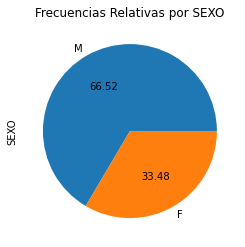

In [22]:
grafica_pie('SEXO') 
#la mayoria de los clientes son varones

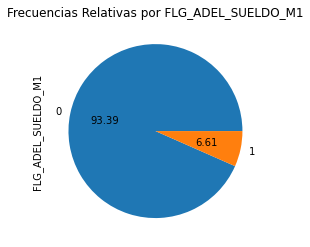

In [23]:
grafica_pie('FLG_ADEL_SUELDO_M1')
#Solo el 6.61% obtuvo un adelanto de sueldo 1 mes antes de la campaña

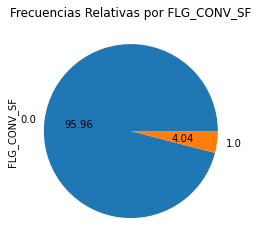

In [24]:
grafica_pie('FLG_CONV_SF')  
#Solo hubo un 4.04% de convenios un mes antes de la campaña en el sistema financiero

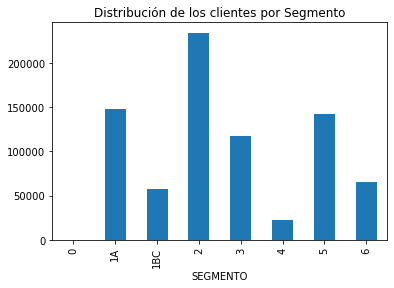

In [25]:
# Grafico de distribucion de clientes por SEGEMENTO
df_train_fuga.groupby('SEGMENTO').size().plot(kind='bar')
plt.title('Distribución de los clientes por Segmento')
plt.show()


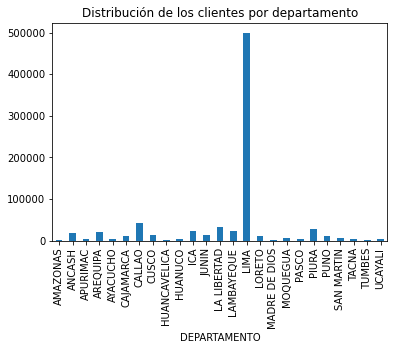

In [26]:
# Grafico de distribucion de clientes por DEPARTAMENTO
df_train_fuga.groupby('DEPARTAMENTO').size().plot(kind='bar')
plt.title('Distribución de los clientes por departamento')
plt.show()
#PODEMOS OBSERVAR QUE POR GRAN DIFERENCIA QUE LA MAYORIA DE 
#CLIENTES SE ENCUENTRAN EN LIMA

In [27]:
df_train_fuga.corr() 
#Evaluamos la correlacion existente entre variables

,TARGET_MODEL2,EDAD,INGRESO_BRUTO_M1,FLG_ADEL_SUELDO_M1,FREC_AGENTE,FLG_CONV_SF,FREC_KIOSKO,FREC_BPI_TD,PROM_CTD_TRX_6M,ANT_CLIENTE,CTD_RECLAMOS_M1
TARGET_MODEL2,1.000000,-0.099910,-0.027679,0.039464,0.072230,-0.022393,0.069696,0.019426,-0.005719,-0.058181,0.006251
EDAD,-0.099910,1.000000,0.124815,-0.059054,-0.118727,0.082007,-0.088276,-0.079606,0.000080,0.282630,-0.008569
INGRESO_BRUTO_M1,-0.027679,0.124815,1.000000,-0.013553,-0.045131,0.028268,0.036599,0.188431,0.292224,0.086854,-0.002471
FLG_ADEL_SUELDO_M1,0.039464,-0.059054,-0.013553,1.000000,0.092001,0.016854,0.172604,0.057773,0.034367,-0.047011,-0.001098
FREC_AGENTE,0.072230,-0.118727,-0.045131,0.092001,1.000000,-0.020157,0.152102,0.093756,0.006795,-0.073852,0.001594
FLG_CONV_SF,-0.022393,0.082007,0.028268,0.016854,-0.020157,1.000000,0.000723,-0.012079,-0.003327,0.015504,-0.001443
FREC_KIOSKO,0.069696,-0.088276,0.036599,0.172604,0.152102,0.000723,1.000000,0.048628,0.117037,-0.046667,0.003109
FREC_BPI_TD,0.019426,-0.079606,0.188431,0.057773,0.093756,-0.012079,0.048628,1.000000,0.205060,-0.012054,0.000316
PROM_CTD_TRX_6M,-0.005719,0.000080,0.292224,0.034367,0.006795,-0.003327,0.117037,0.205060,1.000000,0.039526,-0.001252
ANT_CLIENTE,-0.058181,0.282630,0.086854,-0.047011,-0.073852,0.015504,-0.046667,-0.012054,0.039526,1.000000,-0.006866


In [28]:
# Entre las variables con mas correlacion tenemos :[ANT_CLIENTE - EDAD(0.28)]
#[PROM_CTD_TRX_6M - INGRESO_BRUTO_M1 (0.29)] [PROM_CTD_TRX_6M - FREC_BPI_TD (0.205)]

In [29]:
variables=['EDAD', 'SEXO', 'DEPARTAMENTO', 'INGRESO_BRUTO_M1',
       'SEGMENTO', 'FLG_ADEL_SUELDO_M1', 'FREC_AGENTE', 'FLG_CONV_SF',
       'FREC_KIOSKO', 'FREC_BPI_TD', 'PROM_CTD_TRX_6M', 'ANT_CLIENTE',
       'CTD_RECLAMOS_M1']

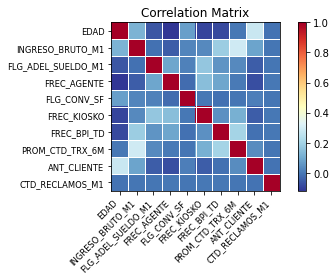

In [30]:
# PARA PODER VISUALIZAR MEJOR LAS CORRELACIONES DESARROLLAMOS LA GRÁFICA SIGUIENTE
corr=df_train_fuga[variables].corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show() #LAS CORRELACIONES TIENDEN A SER MUY BAJAS <0.4

In [31]:
#Graficamos algunas variables con mayor correlacion entre ellas
var=['EDAD', 'ANT_CLIENTE','INGRESO_BRUTO_M1','PROM_CTD_TRX_6M','FREC_BPI_TD']

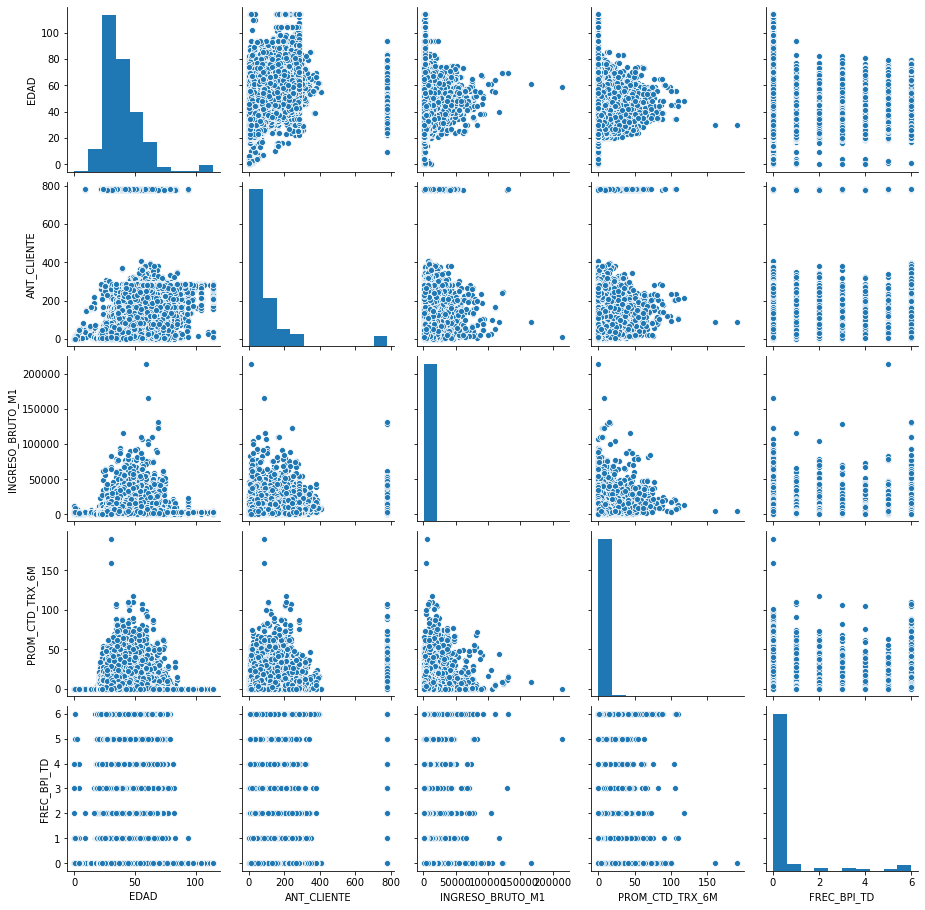

In [32]:
sns.pairplot(data=df_train_fuga[var])

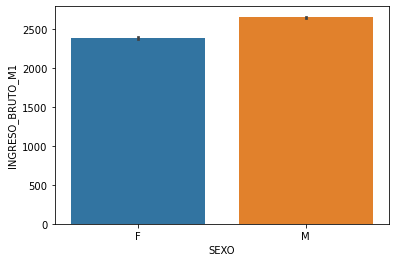

In [33]:
sns.barplot(x='SEXO', y='INGRESO_BRUTO_M1', data=df_train_fuga) 
#Los hombres obtuvieron un ingreso bruto mayor al de las mujeres en el mes anterior

## **_2.Realizar un análisis exploratorio sobre presencia de outliers. (2 puntos)_**

In [34]:
variables=['EDAD',  'INGRESO_BRUTO_M1'
       , 'FLG_ADEL_SUELDO_M1', 'FREC_AGENTE', 'FLG_CONV_SF',
       'FREC_KIOSKO', 'FREC_BPI_TD', 'PROM_CTD_TRX_6M', 'ANT_CLIENTE',
       'CTD_RECLAMOS_M1']
#NOS QUEDAMOS CON LAS VARIABLES CUANTITATIVAS

In [35]:
z = np.abs(stats.zscore(df_train_fuga[variables])) 
#valor absoluto de las z-score
print(z)

[[4.28441250e-01 4.71536291e-16 2.65956222e-01 ... 2.12897170e-01
  7.48516882e-01 1.38486109e-02]
 [9.36281871e-01 7.44073772e-01 2.65956222e-01 ... 2.12897170e-01
  1.11858759e-01 1.38486109e-02]
 [2.65024396e+00 4.71536291e-16 2.65956222e-01 ... 2.12897170e-01
  1.00065871e+00 1.38486109e-02]
 ...
 [3.96799758e-01 1.53455189e+00 2.65956222e-01 ... 1.89140650e-01
  2.72657533e-01 1.38486109e-02]
 [5.87239990e-01 5.52766594e-01 2.65956222e-01 ... 2.12897170e-01
  6.00441914e-01 1.38486109e-02]
 [1.42879447e-01 8.25299115e-01 2.65956222e-01 ... 9.93216290e-01
  3.41996537e-01 1.38486109e-02]]


In [36]:
#Iniciamos evaluando la presencia de outliers con un K=3
k = 3
print(np.where(z > k))

(array([     1,      7,      8, ..., 787488, 787490, 787491], dtype=int64), array([4, 6, 8, ..., 2, 4, 7], dtype=int64))


In [37]:
df_train_fuga_o = df_train_fuga[(z < 3).all(axis=1)]
df_train_fuga_o.head()

,TARGET_MODEL2,EDAD,SEXO,DEPARTAMENTO,INGRESO_BRUTO_M1,SEGMENTO,FLG_ADEL_SUELDO_M1,FREC_AGENTE,FLG_CONV_SF,FREC_KIOSKO,FREC_BPI_TD,PROM_CTD_TRX_6M,ANT_CLIENTE,CTD_RECLAMOS_M1
0,0,46,F,PIURA,2565.256405,2,0,0,0.0,0,0,0.0,224.0,0
2,0,81,M,LIMA,2565.256405,6,0,0,0.0,0,0,0.0,264.0,0
3,0,42,M,PIURA,936.000000,2,0,0,0.0,0,0,0.0,263.0,0
4,0,52,M,MOQUEGUA,5844.000000,1BC,0,0,0.0,0,0,0.0,263.0,0
5,0,74,M,LA LIBERTAD,2565.256405,6,0,0,0.0,0,0,0.0,256.0,0


In [38]:
len(df_train_fuga) 
#TAMAÑO TOTAL DEL DATAFRAME

787495

In [39]:
len(df_train_fuga_o) 
# CANTIDAD DE DATA SIN LA PRESENCIA DE OUTLIERS

566103

In [40]:
len(df_train_fuga)-len(df_train_fuga_o) 
#DETECTAMOS 221392 VALORES FUERA DEL RANGO ESTABLECIDO (OUTLIERS)

221392

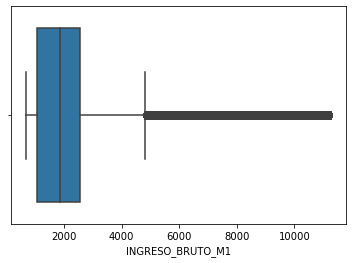

In [41]:
sns.boxplot (x = df_train_fuga_o ['INGRESO_BRUTO_M1']) 
#GRAFICA BOXPLOT PARA INGRESO_BRUTO_M1

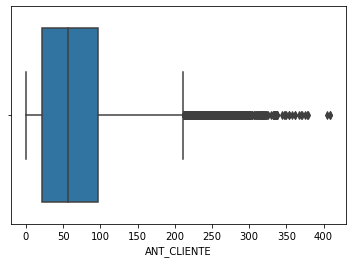

In [42]:
sns.boxplot (x = df_train_fuga_o ['ANT_CLIENTE']) #GRAFICA BOXPLOT PARA ANT_CLIENTE

In [43]:
#Evaluamos la presencia de outliers con un K=2
k = 2
len(np.where(z > k))


2

In [44]:
df_train_fuga_o = df_train_fuga[(z < 2).all(axis=1)]
df_train_fuga_o.head()

,TARGET_MODEL2,EDAD,SEXO,DEPARTAMENTO,INGRESO_BRUTO_M1,SEGMENTO,FLG_ADEL_SUELDO_M1,FREC_AGENTE,FLG_CONV_SF,FREC_KIOSKO,FREC_BPI_TD,PROM_CTD_TRX_6M,ANT_CLIENTE,CTD_RECLAMOS_M1
0,0,46,F,PIURA,2565.256405,2,0,0,0.0,0,0,0.0,224.0,0
3,0,42,M,PIURA,936.000000,2,0,0,0.0,0,0,0.0,263.0,0
4,0,52,M,MOQUEGUA,5844.000000,1BC,0,0,0.0,0,0,0.0,263.0,0
6,0,66,M,LA LIBERTAD,4232.000000,1BC,0,0,0.0,0,0,0.0,85.0,0
9,0,63,M,ANCASH,936.000000,2,0,0,0.0,0,0,0.0,272.0,0


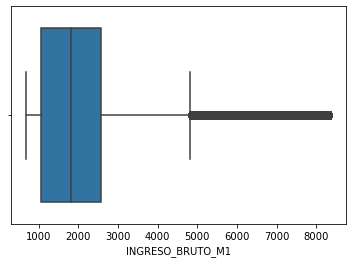

In [45]:
sns.boxplot (x = df_train_fuga_o ['INGRESO_BRUTO_M1'])

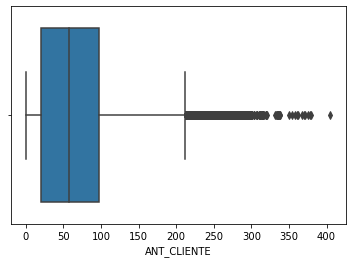

In [46]:
sns.boxplot (x = df_train_fuga_o ['ANT_CLIENTE'])

In [47]:
len(df_train_fuga_o)

515569

In [48]:
len(df_train_fuga)-len(df_train_fuga_o) 
#DETECTAMOS 271926 VALORES FUERA DEL RANGO ESTABLECIDO (OUTLIERS)

271926

In [49]:
#CON K=3 -- 221392
#CON K=2 -- 271926

## **_3. Realizar una discretización de las variables : INGRESO_BRUTO_M1 y EDAD teniendo en cuenta al menos dos técnicas de discretización no supervisada y agregar las variables discretizadas a nuestro conjunto de datos original (2 puntos)_**

**_Para la variable INGRESO_BRUTO_M1_**

**1era Discretizacion No supervisada por strategy=Uniform**

In [50]:
#Creando una instancia de KBinsDiscretizer
amplitud=KBinsDiscretizer(n_bins=3,
                         encode='ordinal',
                         strategy='uniform')# uniform por ser intervalos de igual amplitud

In [51]:
nuevo_amplitud=amplitud.fit_transform(df_train_fuga[["INGRESO_BRUTO_M1"]])

In [52]:
df_train_fuga['INGRESO_BRUTO_M1_Discr_Uniform']=nuevo_amplitud
df_train_fuga.head()

,TARGET_MODEL2,EDAD,SEXO,DEPARTAMENTO,INGRESO_BRUTO_M1,SEGMENTO,FLG_ADEL_SUELDO_M1,FREC_AGENTE,FLG_CONV_SF,FREC_KIOSKO,FREC_BPI_TD,PROM_CTD_TRX_6M,ANT_CLIENTE,CTD_RECLAMOS_M1,INGRESO_BRUTO_M1_Discr_Uniform
0,0,46,F,PIURA,2565.256405,2,0,0,0.0,0,0,0.0,224.0,0,0.0
1,0,54,M,LORETO,4718.000000,1BC,0,0,1.0,0,0,0.0,123.0,0,0.0
2,0,81,M,LIMA,2565.256405,6,0,0,0.0,0,0,0.0,264.0,0,0.0
3,0,42,M,PIURA,936.000000,2,0,0,0.0,0,0,0.0,263.0,0,0.0
4,0,52,M,MOQUEGUA,5844.000000,1BC,0,0,0.0,0,0,0.0,263.0,0,0.0


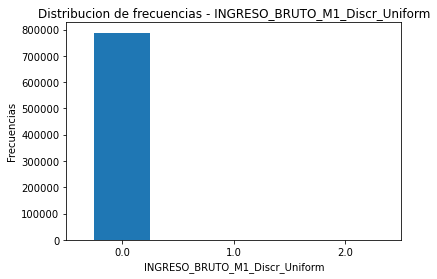

In [53]:
#Esta discretizacion no nos ayuda nada ya que "0.0" contiene todo el conjunto de datos, 
#esto debido a que todos los intervalos tienen el mismo ancho
#y ya con el ancho obtenido en el primer intervalo se incluye toda la data de INGRESO_BRUTO_M1.

df_train_fuga.groupby(df_train_fuga.INGRESO_BRUTO_M1_Discr_Uniform).size().plot(kind='bar',rot=0)
plt.title('Distribucion de frecuencias - INGRESO_BRUTO_M1_Discr_Uniform')
plt.ylabel('Frecuencias')
plt.show() 

In [54]:
#ELiminamos la variable INGRESO_BRUTO_M1_Discr_Uniform ya que no nos ayuda
del df_train_fuga['INGRESO_BRUTO_M1_Discr_Uniform']

**2da Discretizacion No supervisada por strategy=Kmeans**

In [55]:
estkmeas = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
ingresokmeas = estkmeas.fit_transform(df_train_fuga[["INGRESO_BRUTO_M1"]])

In [56]:
df_train_fuga['INGRESO_BRUTO_M1_Discr_Kmeans']=ingresokmeas
df_train_fuga.head()

,TARGET_MODEL2,EDAD,SEXO,DEPARTAMENTO,INGRESO_BRUTO_M1,SEGMENTO,FLG_ADEL_SUELDO_M1,FREC_AGENTE,FLG_CONV_SF,FREC_KIOSKO,FREC_BPI_TD,PROM_CTD_TRX_6M,ANT_CLIENTE,CTD_RECLAMOS_M1,INGRESO_BRUTO_M1_Discr_Kmeans
0,0,46,F,PIURA,2565.256405,2,0,0,0.0,0,0,0.0,224.0,0,0.0
1,0,54,M,LORETO,4718.000000,1BC,0,0,1.0,0,0,0.0,123.0,0,0.0
2,0,81,M,LIMA,2565.256405,6,0,0,0.0,0,0,0.0,264.0,0,0.0
3,0,42,M,PIURA,936.000000,2,0,0,0.0,0,0,0.0,263.0,0,0.0
4,0,52,M,MOQUEGUA,5844.000000,1BC,0,0,0.0,0,0,0.0,263.0,0,1.0


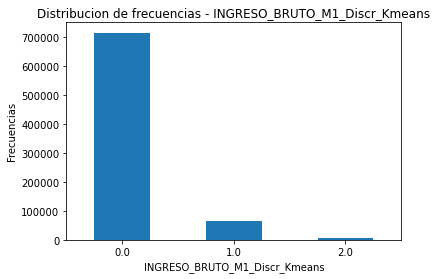

In [57]:
#En este caso KMeans nos ayuda mejor que Uniform debido que ya se visualiza que 
#los 3 intervalos contienen datos, esto debido a que KMeans agrupa los datos de cada intervalo
#según su centroide más cercano. Por defecto toma el valor de quantile. 
df_train_fuga.groupby(df_train_fuga.INGRESO_BRUTO_M1_Discr_Kmeans).size().plot(kind='bar',rot=0)
plt.title('Distribucion de frecuencias - INGRESO_BRUTO_M1_Discr_Kmeans')
plt.ylabel('Frecuencias')
plt.show()

**3ra Discretizacion No supervisada por strategy=quantile**

In [58]:
#Creando una instancia de KBinsDiscretizer
cuantil=KBinsDiscretizer(n_bins=3,
                         encode='ordinal',
                         strategy='quantile')

In [59]:
ingreso_cuantil=cuantil.fit_transform(df_train_fuga[["INGRESO_BRUTO_M1"]])

In [60]:
df_train_fuga['INGRESO_Discr_Quantil']=ingreso_cuantil

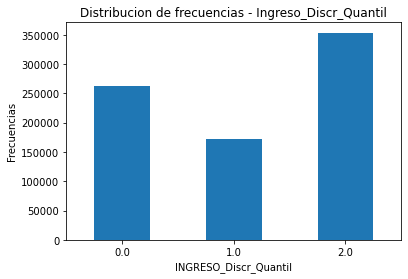

In [61]:
df_train_fuga.groupby(df_train_fuga['INGRESO_Discr_Quantil']).size().plot(kind='bar',rot=0)
plt.title('Distribucion de frecuencias - Ingreso_Discr_Quantil')
plt.ylabel('Frecuencias')
plt.show()
#Como esta discretización usa valores quantilados es por eso 
#que cada contenedor tiene aproximadamente el mismo número de muestras

**_Para la variable EDAD_**

**1era Discretizacion No supervisada por strategy=Quantile**

In [62]:
#Creando una instancia de KBinsDiscretizer usando como strategy = quantile
cuantil=KBinsDiscretizer(n_bins=3,
                         encode='ordinal',
                         strategy='quantile')

In [63]:
nuevo_cuantil=cuantil.fit_transform(df_train_fuga[['EDAD']])

In [64]:
df_train_fuga['EDAD_Discr_Quantil']=nuevo_cuantil
df_train_fuga.head()

,TARGET_MODEL2,EDAD,SEXO,DEPARTAMENTO,INGRESO_BRUTO_M1,SEGMENTO,FLG_ADEL_SUELDO_M1,FREC_AGENTE,FLG_CONV_SF,FREC_KIOSKO,FREC_BPI_TD,PROM_CTD_TRX_6M,ANT_CLIENTE,CTD_RECLAMOS_M1,INGRESO_BRUTO_M1_Discr_Kmeans,INGRESO_Discr_Quantil,EDAD_Discr_Quantil
0,0,46,F,PIURA,2565.256405,2,0,0,0.0,0,0,0.0,224.0,0,0.0,2.0,2.0
1,0,54,M,LORETO,4718.000000,1BC,0,0,1.0,0,0,0.0,123.0,0,0.0,2.0,2.0
2,0,81,M,LIMA,2565.256405,6,0,0,0.0,0,0,0.0,264.0,0,0.0,2.0,2.0
3,0,42,M,PIURA,936.000000,2,0,0,0.0,0,0,0.0,263.0,0,0.0,0.0,2.0
4,0,52,M,MOQUEGUA,5844.000000,1BC,0,0,0.0,0,0,0.0,263.0,0,1.0,2.0,2.0


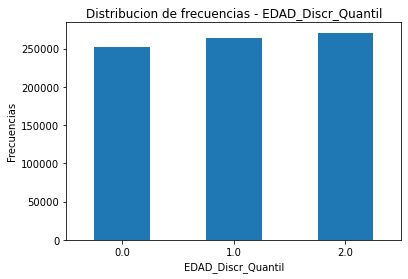

In [65]:
df_train_fuga.groupby(df_train_fuga.EDAD_Discr_Quantil).size().plot(kind='bar',rot=0)
plt.title('Distribucion de frecuencias - EDAD_Discr_Quantil')
plt.ylabel('Frecuencias')
plt.show()

**2da Discretizacion No supervisada por strategy=KMeans**

In [66]:
#Creando una instancia de KBinsDiscretizer
kmeans=KBinsDiscretizer(n_bins=3,
                         encode='ordinal',
                         strategy='kmeans')

In [67]:
edad_kmeans=kmeans.fit_transform(df_train_fuga[['EDAD']])

In [68]:
df_train_fuga['EDAD_Discr_KMeans']=edad_kmeans
df_train_fuga.head()

,TARGET_MODEL2,EDAD,SEXO,DEPARTAMENTO,INGRESO_BRUTO_M1,SEGMENTO,FLG_ADEL_SUELDO_M1,FREC_AGENTE,FLG_CONV_SF,FREC_KIOSKO,FREC_BPI_TD,PROM_CTD_TRX_6M,ANT_CLIENTE,CTD_RECLAMOS_M1,INGRESO_BRUTO_M1_Discr_Kmeans,INGRESO_Discr_Quantil,EDAD_Discr_Quantil,EDAD_Discr_KMeans
0,0,46,F,PIURA,2565.256405,2,0,0,0.0,0,0,0.0,224.0,0,0.0,2.0,2.0,1.0
1,0,54,M,LORETO,4718.000000,1BC,0,0,1.0,0,0,0.0,123.0,0,0.0,2.0,2.0,1.0
2,0,81,M,LIMA,2565.256405,6,0,0,0.0,0,0,0.0,264.0,0,0.0,2.0,2.0,2.0
3,0,42,M,PIURA,936.000000,2,0,0,0.0,0,0,0.0,263.0,0,0.0,0.0,2.0,1.0
4,0,52,M,MOQUEGUA,5844.000000,1BC,0,0,0.0,0,0,0.0,263.0,0,1.0,2.0,2.0,1.0


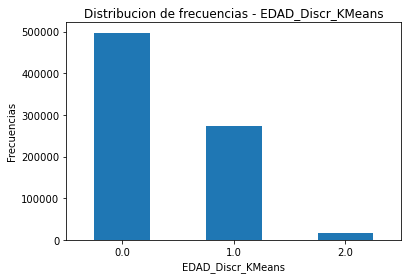

In [69]:
df_train_fuga.groupby(df_train_fuga.EDAD_Discr_KMeans).size().plot(kind='bar',rot=0)
plt.title('Distribucion de frecuencias - EDAD_Discr_KMeans')
plt.ylabel('Frecuencias')
plt.show()

## **_4. Aplicar dos técnicas de balanceo de datos a nuestra variable TARGET (objetivo) y agregarlas a nuestro conjunto de datos original_**

In [70]:
#Refrescando la data
df_train_fuga.head()

,TARGET_MODEL2,EDAD,SEXO,DEPARTAMENTO,INGRESO_BRUTO_M1,SEGMENTO,FLG_ADEL_SUELDO_M1,FREC_AGENTE,FLG_CONV_SF,FREC_KIOSKO,FREC_BPI_TD,PROM_CTD_TRX_6M,ANT_CLIENTE,CTD_RECLAMOS_M1,INGRESO_BRUTO_M1_Discr_Kmeans,INGRESO_Discr_Quantil,EDAD_Discr_Quantil,EDAD_Discr_KMeans
0,0,46,F,PIURA,2565.256405,2,0,0,0.0,0,0,0.0,224.0,0,0.0,2.0,2.0,1.0
1,0,54,M,LORETO,4718.000000,1BC,0,0,1.0,0,0,0.0,123.0,0,0.0,2.0,2.0,1.0
2,0,81,M,LIMA,2565.256405,6,0,0,0.0,0,0,0.0,264.0,0,0.0,2.0,2.0,2.0
3,0,42,M,PIURA,936.000000,2,0,0,0.0,0,0,0.0,263.0,0,0.0,0.0,2.0,1.0
4,0,52,M,MOQUEGUA,5844.000000,1BC,0,0,0.0,0,0,0.0,263.0,0,1.0,2.0,2.0,1.0


In [71]:
df_train_fuga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787495 entries, 0 to 787494
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   TARGET_MODEL2                  787495 non-null  int64  
 1   EDAD                           787495 non-null  int64  
 2   SEXO                           787495 non-null  object 
 3   DEPARTAMENTO                   787495 non-null  object 
 4   INGRESO_BRUTO_M1               787495 non-null  float64
 5   SEGMENTO                       787495 non-null  object 
 6   FLG_ADEL_SUELDO_M1             787495 non-null  int64  
 7   FREC_AGENTE                    787495 non-null  int64  
 8   FLG_CONV_SF                    787495 non-null  float64
 9   FREC_KIOSKO                    787495 non-null  int64  
 10  FREC_BPI_TD                    787495 non-null  int64  
 11  PROM_CTD_TRX_6M                787495 non-null  float64
 12  ANT_CLIENTE                   

In [72]:
df_train_fuga.columns

Index(['TARGET_MODEL2', 'EDAD', 'SEXO', 'DEPARTAMENTO', 'INGRESO_BRUTO_M1',
       'SEGMENTO', 'FLG_ADEL_SUELDO_M1', 'FREC_AGENTE', 'FLG_CONV_SF',
       'FREC_KIOSKO', 'FREC_BPI_TD', 'PROM_CTD_TRX_6M', 'ANT_CLIENTE',
       'CTD_RECLAMOS_M1', 'INGRESO_BRUTO_M1_Discr_Kmeans',
       'INGRESO_Discr_Quantil', 'EDAD_Discr_Quantil', 'EDAD_Discr_KMeans'],
      dtype='object')

In [73]:
columnas_xy=['EDAD','INGRESO_BRUTO_M1','FLG_ADEL_SUELDO_M1', 'FREC_AGENTE', 'FLG_CONV_SF',
            'FREC_KIOSKO', 'FREC_BPI_TD', 'PROM_CTD_TRX_6M', 'ANT_CLIENTE','CTD_RECLAMOS_M1',
            'TARGET_MODEL2']

df_train_fuga_T=df_train_fuga[columnas_xy] 
#INGRESAMOS SOLO LAS VARIABLES A EVALUAR EN EL BALANCEO DE DATOS

In [74]:
df_train_fuga_T.head()

,EDAD,INGRESO_BRUTO_M1,FLG_ADEL_SUELDO_M1,FREC_AGENTE,FLG_CONV_SF,FREC_KIOSKO,FREC_BPI_TD,PROM_CTD_TRX_6M,ANT_CLIENTE,CTD_RECLAMOS_M1,TARGET_MODEL2
0,46,2565.256405,0,0,0.0,0,0,0.0,224.0,0,0
1,54,4718.000000,0,0,1.0,0,0,0.0,123.0,0,0
2,81,2565.256405,0,0,0.0,0,0,0.0,264.0,0,0
3,42,936.000000,0,0,0.0,0,0,0.0,263.0,0,0
4,52,5844.000000,0,0,0.0,0,0,0.0,263.0,0,0


In [75]:
X, y = df_train_fuga_T.iloc[:, 0:10].values, df_train_fuga_T.iloc[:, 10].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, #valores de los predictores
                     y, #los valores del target
                     test_size=0.3, #proporción para datos de testeo
                     random_state=0, #semilla
                     stratify=y) #la variable de estratificación

In [76]:
columnas_x=['EDAD','INGRESO_BRUTO_M1','FLG_ADEL_SUELDO_M1', 'FREC_AGENTE', 'FLG_CONV_SF',
           'FREC_KIOSKO', 'FREC_BPI_TD', 'PROM_CTD_TRX_6M', 'ANT_CLIENTE','CTD_RECLAMOS_M1']
#VARIABLES SIN LA TARGET

In [77]:
#Datos de entrenamiento
x_t= pd.DataFrame(X_train, columns=columnas_x)
y_t= pd.DataFrame(y_train, columns=['TARGET_MODEL2'])

df_train_fuga_entrenamiento = pd.concat([x_t, y_t], axis=1)
df_train_fuga_entrenamiento.head()

,EDAD,INGRESO_BRUTO_M1,FLG_ADEL_SUELDO_M1,FREC_AGENTE,FLG_CONV_SF,FREC_KIOSKO,FREC_BPI_TD,PROM_CTD_TRX_6M,ANT_CLIENTE,CTD_RECLAMOS_M1,TARGET_MODEL2
0,41.0,3387.000000,1.0,0.0,0.0,0.0,0.0,0.0,49.0,0.0,0
1,42.0,2270.000000,0.0,0.0,0.0,2.0,6.0,0.0,143.0,0.0,0
2,37.0,1743.000000,0.0,0.0,0.0,0.0,0.0,0.0,781.0,0.0,0
3,64.0,1301.000000,0.0,0.0,0.0,0.0,0.0,0.0,34.0,0.0,0
4,32.0,2565.256405,0.0,0.0,0.0,0.0,0.0,0.0,66.0,0.0,0


In [78]:
count_classes = pd.value_counts(df_train_fuga_entrenamiento['TARGET_MODEL2'], sort = True)
count_classes

0    520624
1     30622
Name: TARGET_MODEL2, dtype: int64

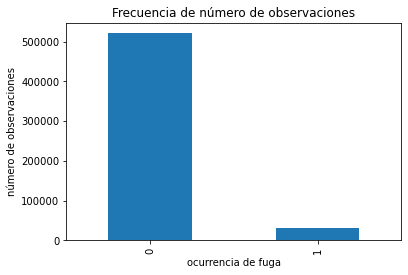

In [79]:

count_classes.plot(kind = 'bar', #bar: gráfico de barras
                   rot=90)#0 = no rotación de las etiquetas del eje x
plt.xticks(range(2))
plt.title("Frecuencia de número de observaciones")
plt.xlabel("ocurrencia de fuga")
plt.ylabel("número de observaciones")
plt.show()
# GRAFICA DE BARRAS PARA MOSTRAR EL DESBALANCEO EXISTENTE EN LA DATA

### **_Uso de UNDERSAMPLING_**

In [80]:
#Primero creamos una instancia de NearMiss
under=NearMiss(sampling_strategy=0.8, #proporcion de balanceo final
              n_neighbors=11) #numero de vecinos a considerar en la aleatoriedad

In [81]:
#fit_resample me brinda la data ya balanceada y me incluye en
#las variables xtrain_under, ytrain_under
xtrain_under,ytrain_under= under.fit_resample(x_t,y_t)

In [82]:
x_t_unds= pd.DataFrame(xtrain_under, columns=columnas_x)
y_t_unds= pd.DataFrame(ytrain_under, columns=['TARGET_MODEL2'])

df_train_fuga_entrenamiento_unds = pd.concat([x_t_unds, y_t_unds], axis=1)
df_train_fuga_entrenamiento_unds.head()

,EDAD,INGRESO_BRUTO_M1,FLG_ADEL_SUELDO_M1,FREC_AGENTE,FLG_CONV_SF,FREC_KIOSKO,FREC_BPI_TD,PROM_CTD_TRX_6M,ANT_CLIENTE,CTD_RECLAMOS_M1,TARGET_MODEL2
0,22.0,2565.256405,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0
1,22.0,2565.256405,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0
2,25.0,2565.256405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,21.0,2565.256405,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0
4,24.0,2565.256405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [83]:
count_classes = pd.value_counts(df_train_fuga_entrenamiento_unds['TARGET_MODEL2'], sort = True)
count_classes

0    38277
1    30622
Name: TARGET_MODEL2, dtype: int64

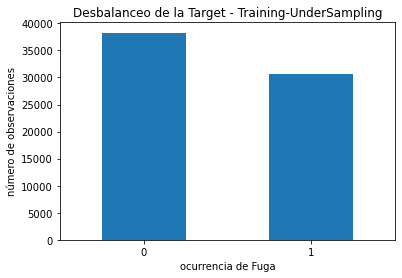

In [84]:
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2))
plt.title("Desbalanceo de la Target - Training-UnderSampling")
plt.xlabel("ocurrencia de Fuga")
plt.ylabel("número de observaciones")
plt.show()
# GRAFICA DE BARRAS DE LA DATA BALANCEADA POR EL METODO UNDERSAMPLING

### **_Uso de OVERSAMPLING_**

In [85]:
#Creamos una instancia de RandomOverSampler
over=RandomOverSampler(sampling_strategy=0.8,
                      random_state=2020)

In [86]:
xtrain_over,ytrain_over=over.fit_resample(x_t,y_t) 

In [87]:
x_t_over= pd.DataFrame(xtrain_over, columns=columnas_x)
y_t_over= pd.DataFrame(ytrain_over, columns=['TARGET_MODEL2'])

df_train_fuga_entrenamiento_over = pd.concat([x_t_over, y_t_over], axis=1)
df_train_fuga_entrenamiento_over.head()

,EDAD,INGRESO_BRUTO_M1,FLG_ADEL_SUELDO_M1,FREC_AGENTE,FLG_CONV_SF,FREC_KIOSKO,FREC_BPI_TD,PROM_CTD_TRX_6M,ANT_CLIENTE,CTD_RECLAMOS_M1,TARGET_MODEL2
0,41.0,3387.000000,1.0,0.0,0.0,0.0,0.0,0.0,49.0,0.0,0
1,42.0,2270.000000,0.0,0.0,0.0,2.0,6.0,0.0,143.0,0.0,0
2,37.0,1743.000000,0.0,0.0,0.0,0.0,0.0,0.0,781.0,0.0,0
3,64.0,1301.000000,0.0,0.0,0.0,0.0,0.0,0.0,34.0,0.0,0
4,32.0,2565.256405,0.0,0.0,0.0,0.0,0.0,0.0,66.0,0.0,0


In [88]:
#Calculando las frecuencias por categoria
count_classes_over=pd.value_counts(df_train_fuga_entrenamiento_over.TARGET_MODEL2)
count_classes_over

0    520624
1    416499
Name: TARGET_MODEL2, dtype: int64

In [89]:
#Verificando la proporcion 
prop=round(count_classes_over[1]*100/count_classes_over[0],1)
prop

80.0

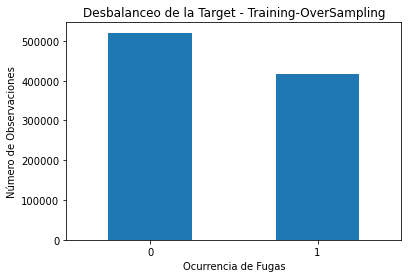

In [90]:
#Graficando el Desbalanceo de la Target en el Training Set
count_classes_over.plot(kind='bar',rot=0)
plt.title('Desbalanceo de la Target - Training-OverSampling')
plt.xlabel('Ocurrencia de Fugas')
plt.ylabel('Número de Observaciones')
plt.show()
# SE MUESTRA EL BALANCEO REALIZADO CON EL METODO OVERSAMPLING

In [91]:
df_train_fuga['TARGET_MODEL2_UnderSampling']=df_train_fuga_entrenamiento_unds.TARGET_MODEL2
df_train_fuga['TARGET_MODEL2_OverSampling']=df_train_fuga_entrenamiento_over.TARGET_MODEL2
#SE INCLUYE AMBOS BALANCEOS DE LA VARIABLE TARGET 
#EN LA DATA ORIGINAL df_train_fuga

In [92]:
df_train_fuga.head()

,TARGET_MODEL2,EDAD,SEXO,DEPARTAMENTO,INGRESO_BRUTO_M1,SEGMENTO,FLG_ADEL_SUELDO_M1,FREC_AGENTE,FLG_CONV_SF,FREC_KIOSKO,FREC_BPI_TD,PROM_CTD_TRX_6M,ANT_CLIENTE,CTD_RECLAMOS_M1,INGRESO_BRUTO_M1_Discr_Kmeans,INGRESO_Discr_Quantil,EDAD_Discr_Quantil,EDAD_Discr_KMeans,TARGET_MODEL2_UnderSampling,TARGET_MODEL2_OverSampling
0,0,46,F,PIURA,2565.256405,2,0,0,0.0,0,0,0.0,224.0,0,0.0,2.0,2.0,1.0,0.0,0
1,0,54,M,LORETO,4718.000000,1BC,0,0,1.0,0,0,0.0,123.0,0,0.0,2.0,2.0,1.0,0.0,0
2,0,81,M,LIMA,2565.256405,6,0,0,0.0,0,0,0.0,264.0,0,0.0,2.0,2.0,2.0,0.0,0
3,0,42,M,PIURA,936.000000,2,0,0,0.0,0,0,0.0,263.0,0,0.0,0.0,2.0,1.0,0.0,0
4,0,52,M,MOQUEGUA,5844.000000,1BC,0,0,0.0,0,0,0.0,263.0,0,1.0,2.0,2.0,1.0,0.0,0


## **_CASO 2_**

### 1. Realizar un análisis de componentes principales para reducción de la dimensionalidad 

In [93]:
# OBTENEMOS LA DATA CON LA QUE SE TRABAJARÁ
miArchivo="AusentismoPres2011.sav"
poblacion=pd.read_spss(miArchivo)
poblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1833 entries, 0 to 1832
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ubigeo                   1833 non-null   object  
 1   departamento             1833 non-null   object  
 2   dom_Geo                  1833 non-null   object  
 3   provincia                1833 non-null   object  
 4   distrito                 1833 non-null   object  
 5   total_electoral          1833 non-null   float64 
 6   total_ausentismo         1833 non-null   float64 
 7   porc_Ausentismo          1833 non-null   float64 
 8   ord_Ausentismo           1833 non-null   category
 9   dic_Ausentismo           1833 non-null   category
 10  porc_hogares_sin_medios  1832 non-null   float64 
 11  IDH                      1833 non-null   float64 
 12  alfabetismo              1833 non-null   float64 
 13  partidoGanador           1833 non-null   object  
 14  porc_2_N

In [94]:
columns=['ubigeo', 'departamento', 'dom_Geo', 'provincia', 'distrito',
       'total_electoral', 'total_ausentismo', 'porc_Ausentismo',
       'ord_Ausentismo', 'dic_Ausentismo', 'porc_hogares_sin_medios', 'IDH',
       'alfabetismo', 'partidoGanador', 'porc_2_NBI', 'GINI']

In [95]:
#Creacion del dataframe
df_poblacion=pd.DataFrame(poblacion, columns=columns)
df_poblacion.head()

,ubigeo,departamento,dom_Geo,provincia,distrito,total_electoral,total_ausentismo,porc_Ausentismo,ord_Ausentismo,dic_Ausentismo,porc_hogares_sin_medios,IDH,alfabetismo,partidoGanador,porc_2_NBI,GINI
0,010102,Amazonas,Norte,Chachapoyas,Asunción,234.0,59.0,25.213675,Ausentismo Grave,Ausentismo Fuerte,100.00,0.581463,86.893200,PERU POSIBLE,51.11,0.30
1,010103,Amazonas,Norte,Chachapoyas,Balsas,848.0,208.0,24.528301,Ausentismo Grave,Ausentismo Fuerte,94.87,0.562141,86.527290,FUERZA 2011,20.23,0.31
2,010104,Amazonas,Norte,Chachapoyas,Cheto,478.0,51.0,10.669457,Ausentismo Bajo,Ausentismo Leve,99.40,0.599150,92.838196,GANA PERU,16.87,0.28
3,010105,Amazonas,Norte,Chachapoyas,Chiliquín,638.0,197.0,30.877743,Ausentismo Grave,Ausentismo Fuerte,99.60,0.545484,86.541740,FUERZA 2011,31.73,0.29
4,010106,Amazonas,Norte,Chachapoyas,Chuquibamba,1161.0,333.0,28.682170,Ausentismo Grave,Ausentismo Fuerte,99.62,0.584659,92.598430,FUERZA 2011,17.55,0.31


In [96]:
#Verificamos si la data contiene valores NaN
df_poblacion.isnull().sum()

ubigeo                     0
departamento               0
dom_Geo                    0
provincia                  0
distrito                   0
total_electoral            0
total_ausentismo           0
porc_Ausentismo            0
ord_Ausentismo             0
dic_Ausentismo             0
porc_hogares_sin_medios    1
IDH                        0
alfabetismo                0
partidoGanador             0
porc_2_NBI                 1
GINI                       1
dtype: int64

In [97]:
#Identificamos la fila del dataframe que contiene los valores NaN
df_poblacion.loc[df_poblacion.porc_hogares_sin_medios.isna()]

,ubigeo,departamento,dom_Geo,provincia,distrito,total_electoral,total_ausentismo,porc_Ausentismo,ord_Ausentismo,dic_Ausentismo,porc_hogares_sin_medios,IDH,alfabetismo,partidoGanador,porc_2_NBI,GINI
440,050104,Ayacucho,Sur,Huamanga,Carmen Alto,10817.0,1579.0,14.597393,Ausentismo Moderado,Ausentismo Leve,NaN,0.589203,85.7693,GANA PERU,NaN,NaN


In [98]:
#Eliminamos la fila
df_poblacion.drop(index=440,inplace=True)

In [99]:
#Data sin valores NaN
df_poblacion.isnull().sum()

ubigeo                     0
departamento               0
dom_Geo                    0
provincia                  0
distrito                   0
total_electoral            0
total_ausentismo           0
porc_Ausentismo            0
ord_Ausentismo             0
dic_Ausentismo             0
porc_hogares_sin_medios    0
IDH                        0
alfabetismo                0
partidoGanador             0
porc_2_NBI                 0
GINI                       0
dtype: int64

In [100]:
#Evaluamos la variable GINI (posible target)
pd.value_counts(df_poblacion.GINI)

0.290    234
0.280    226
0.300    183
0.270    171
0.310    152
0.260    132
0.330    106
0.250     95
0.320     95
0.340     74
0.240     69
0.230     62
0.350     50
0.220     47
0.210     41
0.360     35
0.200     18
0.380     14
0.370     14
0.400      5
0.390      3
0.410      2
0.442      1
0.190      1
0.420      1
0.430      1
Name: GINI, dtype: int64

In [101]:
#DISCRETIZAREMOS LA VARIABLE GINI PARA PODER OBTENER UNA COLUMNA ADICIONAL EN LA 
#DATA QUE SERVIA COMO TARGET (con valores 0 y 1)
#Creando una instancia de KBinsDiscretizer
kmeans=KBinsDiscretizer(n_bins=2,
                         encode='ordinal',
                         strategy='kmeans')

In [102]:
gini_discretizer=kmeans.fit_transform(df_poblacion[['GINI']])
#Elijo Kmeans debido a que esta strategy agrupa los datos de cada intervalo 
#según su centroide más cercano, la cual nos ayudará a discriminar la data en 
#dos grupos en los cuales valores con poco valor GINI se agruparan y tambien lo
#haran los de mayor valor GINI APROXIMADAMENTE EL VALOR < 0.3 (BRINDA VALOR DISCRETIZADO 0) 
#Y VALOR>0.3 (BRINDA VALOR DISCRETIZADO 1)

In [103]:
df_poblacion['TARGET_GINI']=gini_discretizer

In [104]:
pd.value_counts(df_poblacion.TARGET_GINI) 

0.0    1279
1.0     553
Name: TARGET_GINI, dtype: int64

In [105]:
df_poblacion.head()

,ubigeo,departamento,dom_Geo,provincia,distrito,total_electoral,total_ausentismo,porc_Ausentismo,ord_Ausentismo,dic_Ausentismo,porc_hogares_sin_medios,IDH,alfabetismo,partidoGanador,porc_2_NBI,GINI,TARGET_GINI
0,010102,Amazonas,Norte,Chachapoyas,Asunción,234.0,59.0,25.213675,Ausentismo Grave,Ausentismo Fuerte,100.00,0.581463,86.893200,PERU POSIBLE,51.11,0.30,0.0
1,010103,Amazonas,Norte,Chachapoyas,Balsas,848.0,208.0,24.528301,Ausentismo Grave,Ausentismo Fuerte,94.87,0.562141,86.527290,FUERZA 2011,20.23,0.31,1.0
2,010104,Amazonas,Norte,Chachapoyas,Cheto,478.0,51.0,10.669457,Ausentismo Bajo,Ausentismo Leve,99.40,0.599150,92.838196,GANA PERU,16.87,0.28,0.0
3,010105,Amazonas,Norte,Chachapoyas,Chiliquín,638.0,197.0,30.877743,Ausentismo Grave,Ausentismo Fuerte,99.60,0.545484,86.541740,FUERZA 2011,31.73,0.29,0.0
4,010106,Amazonas,Norte,Chachapoyas,Chuquibamba,1161.0,333.0,28.682170,Ausentismo Grave,Ausentismo Fuerte,99.62,0.584659,92.598430,FUERZA 2011,17.55,0.31,1.0


In [106]:
columnasObject=['total_electoral','total_ausentismo','porc_Ausentismo','ubigeo','departamento','dom_Geo','provincia','distrito','partidoGanador','ord_Ausentismo','dic_Ausentismo']
#las columnas que se encuentran en columnasObject son aquellas que no influiran en la evaluacion de la data  
df_poblacion.drop(columnasObject,axis=1, inplace=True)

In [107]:
#GENERAMOS NUESTRAS DATA DE ENTRENAMIENTO Y DE TESTEO
X, y = df_poblacion.iloc[:, 0:5].values, df_poblacion.iloc[:,5].values
X_train, X_test, y_train, y_test = train_test_split(X, #valor de los predictores 
                                                     y, #valor del target o variable objetivo
                                                     test_size=0.3, #proporción de datos para datos de entrenamiento
                                                     stratify=y, #estratificación
                                                     random_state=0) #semilla

In [108]:
sc = StandardScaler() #estamos instanciando la función StandardScaler() en el objeto sc
X_train_std = sc.fit_transform(X_train)#entrenamiento
#fit_transform()- aplicar la función y aprender de los datos de entrenamiento
X_test_std = sc.transform(X_test)#testeo
#transform() - los parámetros de los datos de entrenamiento los aplica a los de testeo
#con el objetivo trazado por la función (en nuestro caso estandarizar datos)

In [109]:
df_poblacion.columns

Index(['porc_hogares_sin_medios', 'IDH', 'alfabetismo', 'porc_2_NBI', 'GINI',
       'TARGET_GINI'],
      dtype='object')

In [110]:
df_poblacion_std=pd.DataFrame(X_train_std,
                     columns=['porc_hogares_sin_medios', 'IDH', 'alfabetismo', 'porc_2_NBI', 'GINI'])
df_poblacion_std.head()
# CREACION DEL DATAFRAME CON VALORES ESTANDARIZADOS Y SIN LA VARIABLE TARGET

,porc_hogares_sin_medios,IDH,alfabetismo,porc_2_NBI,GINI
0,0.406746,-0.699813,-0.920505,-0.070670,0.580304
1,0.632474,-0.382147,0.165970,-0.322286,-1.265725
2,0.716862,0.484334,1.178961,-1.000816,-0.474570
3,-0.820004,0.046992,0.337023,0.822452,0.052867
4,0.122402,-0.528052,-1.366385,-0.651728,0.844022


In [111]:
#APLICANDO CRITERIO DE KEISER

In [112]:
cov_mat = np.cov(X_train_std.T)

In [113]:
autovalores, autovectores = np.linalg.eig(cov_mat)
# OBTENEMOS LOS AUTOVALORES Y AUTOVECTORES

In [114]:
(autovalores>1).sum() 
#AUTOVALORES A USAR SEGUN CRITERIO DE KEISER

2

In [115]:
print('\nAutovalores \n%s' % autovalores)


Autovalores 
[2.68585797 0.0877485  0.38713447 1.00756114 0.83560113]


In [116]:
(autovalores[0]/sum(autovalores))*100

53.67525831588205

In [117]:
cp1 = autovalores[0]/sum(autovalores)
cp1

0.5367525831588205

In [118]:
#función PCA() la instanciamos en el objeto pca
pca = PCA() 
X_train_pca = pca.fit_transform(X_train_std)
#fit_transform
pca.explained_variance_ratio_

array([0.53675258, 0.20135504, 0.16698987, 0.0773665 , 0.01753601])

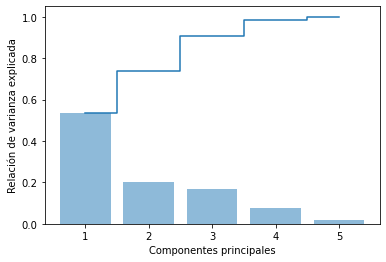

In [119]:
# GENERAMOS LA GRÁFICA DE COMPONENTES PRINCIPALES
plt.bar(range(1, 6), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 6), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Relación de varianza explicada')
plt.xlabel('Componentes principales')

plt.show()

In [120]:
#n_components es el número de componentes que nos indicó Keiser
pca = PCA(n_components=2) 
#fit_transform: ajuste el modelo con X y la reducción de dimensionalidad en X.
X_std = pca.fit_transform(X_train_std)

In [121]:
df_x =pd.DataFrame(X_std)
df_x.columns = ['PC1', 'PC2']
df_x.head()
#CREAMOS EL DATAFRAME CON SOLO LOS COMPONENTES PRINCIPALES

,PC1,PC2
0,-0.990126,0.887781
1,-0.531219,-1.110393
2,0.767478,-0.651175
3,0.368991,-0.195138
4,-0.740935,1.386000


In [122]:
df_y = pd.DataFrame(y_train)
df_y.columns = ['TRAIN_GINI']
df_y.head()
# DATAFRAME CON SOLO LA VARIABLE TRAIN_GINI (NUESTRA TARGET)

,TRAIN_GINI
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0


In [123]:
df_rd = pd.concat([df_x, df_y], axis=1)
df_rd.head(10)
#DATAFRAME CON UN LOS COMPONENTES Y LA VARIABLE TARGET

,PC1,PC2,TRAIN_GINI
0,-0.990126,0.887781,1.0
1,-0.531219,-1.110393,0.0
2,0.767478,-0.651175,0.0
3,0.368991,-0.195138,0.0
4,-0.740935,1.386000,1.0
5,-2.284845,2.325120,1.0
6,-0.199311,0.907641,1.0
7,-0.737763,1.163626,1.0
8,3.278222,-0.249513,0.0
9,3.511603,1.113054,1.0


In [124]:
df_rd.shape

(1282, 3)

### 2. Realizar un análisis factorial para reducción de la dimensionalidad

**_Reingresamos la data_**

In [125]:
#OBTENEMOS EL DATAFRAME A TRABAJAR
df_poblacion=pd.DataFrame(poblacion, columns=columns)
df_poblacion.drop(index=440,inplace=True) # ELIMINAMOS LA FILA CON VALORES NaN

In [126]:
df_poblacion['TARGET_GINI']=gini_discretizer
columnasObject=['total_electoral','total_ausentismo','porc_Ausentismo','ubigeo','departamento','dom_Geo','provincia','distrito','partidoGanador','ord_Ausentismo','dic_Ausentismo']
df_poblacion.drop(columnasObject,axis=1, inplace=True)
# SOLO NOS QUEDAMOS CON LAS VARIABLES DEFINIDAS PARA LA REDUCCIÓN DE DIMENSIONALIDAD

In [127]:
df_poblacion.head()

,porc_hogares_sin_medios,IDH,alfabetismo,porc_2_NBI,GINI,TARGET_GINI
0,100.00,0.581463,86.893200,51.11,0.30,0.0
1,94.87,0.562141,86.527290,20.23,0.31,1.0
2,99.40,0.599150,92.838196,16.87,0.28,0.0
3,99.60,0.545484,86.541740,31.73,0.29,0.0
4,99.62,0.584659,92.598430,17.55,0.31,1.0


In [128]:
#DIVIDIMOS LA DATA EN ENTRENAMIENTO Y TESTEO
x, y = df_poblacion.iloc[:, 0:5].values, df_poblacion.iloc[:,5].values
xtrain, xtest, ytrain, ytest = \
    train_test_split(x, #valor de los predictores 
                     y, #valor del target o variable objetivo
                     test_size=0.3, #proporción de datos para datos de entrenamiento
                     stratify=y, #estratificación
                     random_state=0) #semilla

In [129]:
#Instanciando un objeto de la clase StandardScaler
sc = StandardScaler()
#Aprendiendo y transformando XTRAIN_STD
xtrain_std=sc.fit_transform(xtrain)
#Con lo aprendido de xtrain se debe realizar la transformacion para el Xtest
xtest_std=sc.transform(xtest)

In [130]:
#Instanciando un objeto de la clase FactorAnalysis
FA=FactorAnalysis()
xtrainFA=FA.fit(xtrain_std)

In [131]:
xtrainFA.components_
#OBSERVAMOS QUE DE LAS 5 COLUMNAS SOLO 2 NOS SIRVEN 

array([[-0.77659305,  0.87156675,  0.76904907, -0.41868291,  0.1473104 ],
       [ 0.11042226,  0.05273623,  0.17269153,  0.28029074, -0.23123843],
       [-0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.        , -0.        , -0.        ,  0.        , -0.        ],
       [ 0.        ,  0.        , -0.        ,  0.        ,  0.        ]])

In [132]:
#n_components es el número de componentes que nos indicó xtrainFA.components_
FA=FactorAnalysis(n_components=2,
                  random_state=2020)
xtrain_F2=FA.fit_transform(xtrain_std)#Aprendiendo y transformando xtrain_std
#CREAMOS EL DATAFRAME CON LOS FACTORES OBTENIDOS
xtrain_F2=pd.DataFrame(xtrain_F2, columns=['F1','F2'])
xtrain_F2.head()

,F1,F2
0,-0.743071,0.466660
1,-0.281492,-0.720984
2,0.547616,-1.368214
3,0.212289,0.134432
4,-0.705090,1.228203


In [133]:
df_y = pd.DataFrame(y_train)
df_y.columns = ['TARGET_GINI']
df_y.head() 
#USAMOS EL DF DE VALORES DE LA TARGET (TARGET_GINI)

,TARGET_GINI
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0


In [134]:
df_FA = pd.concat([xtrain_F2, df_y], axis=1)
df_FA.head(10) 
#DATAFRAME FINAL CON LOS FACTORES OBTENIDOS Y LA TARGET_GINI

,F1,F2,TARGET_GINI
0,-0.743071,0.466660,1.0
1,-0.281492,-0.720984,0.0
2,0.547616,-1.368214,0.0
3,0.212289,0.134432,0.0
4,-0.705090,1.228203,1.0
5,-1.607614,1.058168,1.0
6,-0.352688,0.727863,1.0
7,-0.540559,-0.230510,1.0
8,1.915331,0.958100,0.0
9,1.807175,1.225175,1.0


In [135]:
df_FA.shape 
#DIMENSIONALIDAD OBTENIDO LUEGO DEL ANALISIS FACTORIAL

(1282, 3)